### PCP Module 1 - similarity_module

In [1]:
from load_dataset_module import music_features
from load_dataset_module import artist_music

import warnings
warnings.filterwarnings('ignore')

In [2]:
features = music_features()

Finished reading the command for music features.


In [3]:
artists = artist_music()

Finished reading the command for artist music.


In [31]:
def search_artist():
    try:
        feature = str(input("Please enter the feature you want to find for the artists' songs: ").capitalize())
        fName = str(input("Please enter the first name of the artist you want to find: ").capitalize())
        lName = str(input("Please enter the surname of the artist you want to find (entry can be left blank). If the first name of both artists is the same, you will need to enter a surname initial: "\
                         ).capitalize())
    
        # make this output a dict, so it can be used for the other functions
        results_dict = {}
        results = []
        for i in range(1, len(artists)+1):
            if fName + " " + lName in artists[i]['Artists']:
                print("\n")
                print("ID:", i, "|", "Artist/s:", artists[i]['Artists'], "|", "Song:", artists[i]['Song Name'])
                results.append(artists[i][feature])
                
        if len(results) == '':
            return None
        else:
            # need to decide on a useful ID for the created dictionary
            results_dict[fName + " " + lName[0]] = results
    
        return results_dict
    except KeyError:
        return(print("You have entered an incorrect value, please check your entry."))

In [34]:
def join_artist_dict(dict_a, dict_b):
    dict_a = dict_a
    dict_b = dict_b
    dict_a.update(dict_b)
    return dict_a

In [32]:
return1 = search_artist()

Please enter the feature you want to find for the artists' songs: tempo
Please enter the first name of the artist you want to find: carl
Please enter the surname of the artist you want to find (entry can be left blank). If the first name of both artists is the same, you will need to enter a surname initial: p


ID: 1778 | Artist/s: Carl Perkins | Song: Right String but the Wrong Yo Yo


ID: 1919 | Artist/s: Carl Perkins | Song: Good Rockin' Tonight


ID: 3022 | Artist/s: Carl Perkins | Song: All Mama's Children


ID: 9726 | Artist/s: Carl Perkins | Song: Blue Suede Shoes


ID: 10006 | Artist/s: Carl Perkins | Song: "Shake/ Rattle and Roll"


ID: 19078 | Artist/s: Carl Perkins | Song: Dixie Fried


ID: 26074 | Artist/s: "Johann Sebastian Bach/ Carl Philipp Emanuel Bach Chamber Orchestra/ Hartmut Haenchen" | Song: "Brandenburg Concerto No. 3 in G Major/ BWV 1048: III. Allegro"


ID: 34020 | Artist/s: Carl Perkins | Song: Where the Rio De Rosa Flows


ID: 35072 | Artist/s: "Johnny Cash/ T

In [33]:
return2 = search_artist()

Please enter the feature you want to find for the artists' songs: tempo
Please enter the first name of the artist you want to find: carl
Please enter the surname of the artist you want to find (entry can be left blank). If the first name of both artists is the same, you will need to enter a surname initial: w


ID: 1 | Artist/s: Carl Woitschach | Song: Singende Bataillone 1. Teil


ID: 8 | Artist/s: Carl Woitschach | Song: Per aspera ad astra


ID: 8201 | Artist/s: Carl Woitschach | Song: Singende Bataillone 2. Teil


ID: 8204 | Artist/s: Carl Woitschach | Song: "Lore/ Lore/ Lore"


ID: 8228 | Artist/s: Carl Woitschach | Song: Reserve hat Ruh 2. Teil


ID: 88582 | Artist/s: Carl Woitschach | Song: Taxis Marsch


ID: 98042 | Artist/s: Carl Woitschach | Song: Preussens Gloria


ID: 98051 | Artist/s: Carl Woitschach | Song: Unsere Garde


ID: 98072 | Artist/s: Carl Woitschach | Song: Ruhmesmärsche der alten Armee 2. Teil


ID: 107456 | Artist/s: Carl Woitschach | Song: Ruhmesmärsche der a

In [35]:
result = join_artist_dict(return1, return2)
print(result)

{'Carl P': [117.759, 89.292, 79.493, 168.891, 175.578, 161.817, 126.122, 92.189, 97.703, 100.28, 110.774, 100.619, 131.257, 134.391, 110.643, 109.37, 92.847, 96.718, 102.462, 96.564, 91.475, 161.037, 168.891, 175.468, 170.15200000000004, 87.493, 89.936, 157.259, 100.619, 103.146, 172.261, 80.376, 112.942, 110.774, 97.804, 104.746, 82.073, 104.956], 'Carl W': [118.469, 123.31, 120.22, 121.738, 115.65, 116.072, 115.561, 119.497, 114.444, 113.51, 87.396, 121.471, 117.6, 105.812, 119.728, 118.754, 116.534, 120.32, 113.936, 116.137, 122.655]}


## Euclidean Similarity Function

In [18]:
def euclidean_similarity(dict_name, id1, id2):
    import math
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            print("If you are working with defined artist lists, enter 'Yes'")
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = math.sqrt((x - y) ** 2 ) #one-dimensional euclidean formula
                    print(key_list[i].strip('[]').strip(' '), round(distance, 3))
            
            else:
                if len(dict_name) == 2: # must be working with chosen artists
                    x = []
                    y = []
                    
                    for value in dict_name[id1]:
                        x.append(value)
                    for value in dict_name[id2]:
                        y.append(value)
                    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
                    return(print("Euclidean distance from x to y: ",distance))
                
                else: # must be working with default dictionary and values
                    x = dict_name[id1][query]
                    y = dict_name[id2][query]
                    distance = math.sqrt((x - y) ** 2 ) #one-dimensional euclidean formula   
                    return(print("Euclidean Distance of", query, "is", round(distance, 3)))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0.")
    except AttributeError:
        print("You can't compare all features of an artist you have defined.")

In [36]:
euclidean_similarity(return1, 'Carl P', 'Carl W')

If you are working with defined artist lists, enter 'Yes'
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. y
Euclidean distance from x to y:  129.6018143160041


In [38]:
euclidean_similarity(artists, 91, 1491)

If you are working with defined artist lists, enter 'Yes'
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 0.167
'Danceability' 0.236
'Energy' 0.097
'Liveness' 0.43
'Loudness' 5.825
'Popularity' 3.0
'Speechiness' 0.004
'Tempo' 1.79
'Valence' 0.408


## Cosine Similarity Function

In [9]:
def cosine_similarity(dict_name, id1, id2):
    import math
    
    def square_rooted(x):
        return round(math.sqrt(sum([a*a for a in x])),3)
    
    def cosine(x, y):
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = square_rooted(x)*square_rooted(y)
        return round(numerator/float(denominator),3)
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        if i == 5: #divisible by zero issue comes up if this is not present
                            continue
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = cosine([x],[y])
                    print(key_list[i].strip('[]').strip(' '), round(distance, 3))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = cosine([x],[y])
                print("Cosine Similarity of", query, "is", round(distance, 3))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [10]:
cosine_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' 1.0
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0


In [11]:
import math
def square_rooted(x):
    return round(math.sqrt(sum([a*a for a in x])),3)
    
def cosine(x, y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

print(cosine([3, 4, 54], [43,54,67.8]))

0.763


## Pearson Correlation Similarity Function

In [12]:
def pearson_similarity(dict_name, id1, id2):
    import math
    import numpy as np
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        #if i == 5: #skip popularity
                        #    continue
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        pearson_corr = np.corrcoef([x,y])
                    print(key_list[i].strip('[]').strip(' '), pearson_corr)
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                pearson_corr = np.corrcoef([x,y])
                return(pearson_corr)
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.", valueerror)
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [13]:
pearson_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' nan
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0


## Jaccard Similarity Function

J(A, B) = |A∩B| / |A∪B|

In [14]:
def jaccard_similarity(dict_name, id1, id2):
    import math
    
    def jaccard(x, y):
        intersection = len(list(set(x).intersection(y)))
        union = (len(x) + len(y)) - intersection
        return float(intersection) / union
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = jaccard([x],[y])
                    print("Jaccard Similarity:", key_list[i].strip('[]').strip(' '), round(distance, 3))
                    print("Jaccard Distance:  ", key_list[i].strip('[]').strip(' '), (1 - round(distance, 3)))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = jaccard([x],[y])
                print("Jaccard Similarity of", query, "is", round(distance, 3))
                print("Jaccard Distance of", query, "is", (1 - round(distance, 3)))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [15]:
jaccard_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

Jaccard Similarity: 'Accoustiness' 0.0
Jaccard Distance:   'Accoustiness' 1.0
Jaccard Similarity: 'Danceability' 0.0
Jaccard Distance:   'Danceability' 1.0
Jaccard Similarity: 'Energy' 0.0
Jaccard Distance:   'Energy' 1.0
Jaccard Similarity: 'Liveness' 0.0
Jaccard Distance:   'Liveness' 1.0
Jaccard Similarity: 'Loudness' 0.0
Jaccard Distance:   'Loudness' 1.0
Jaccard Similarity: 'Popularity' 1.0
Jaccard Distance:   'Popularity' 0.0
Jaccard Similarity: 'Speechiness' 0.0
Jaccard Distance:   'Speechiness' 1.0
Jaccard Similarity: 'Tempo' 0.0
Jaccard Distance:   'Tempo' 1.0
Jaccard Similarity: 'Valence' 0.0
Jaccard Distance:   'Valence' 1.0


In [16]:
def jaccard(x, y):
    intersection = len(list(set(x).intersection(y)))
    print(intersection)
    union = (len(x) + len(y)) - intersection
    print(union)
    return float(intersection) / union

jaccard([54.3, 25.4], [54.3, 432.112])

1
3


0.3333333333333333

## Manhattan Similarity Function

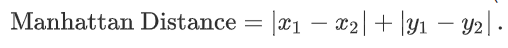

In [17]:
def manhattan_similarity(dict_name, id1, id2):
    import math
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = abs(x - y) #one-dimensional manhattan
                    print(key_list[i].strip('[]').strip(' '), round(distance, 3))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = abs(x - y) #one-dimensional manhattan  
                return(print("Manhattan Distance of", query, "is", round(distance, 3)))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [18]:
manhattan_similarity(features, 6000, 40350)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 0.755
'Danceability' 0.153
'Energy' 0.124
'Liveness' 0.291
'Loudness' 0.701
'Popularity' 42.0
'Speechiness' 0.893
'Tempo' 48.182
'Valence' 0.377


In [19]:
euclidean_similarity(features, 30, 40)
cosine_similarity(features, 30, 40)
pearson_similarity(features, 30, 40)
jaccard_similarity(features, 30, 40)
manhattan_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 0.091
'Danceability' 0.023
'Energy' 0.062
'Liveness' 0.084
'Loudness' 3.232
'Popularity' 0.0
'Speechiness' 0.004
'Tempo' 27.398
'Valence' 0.158
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' 1.0
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' nan
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all 

In [178]:
artists[8]

{'ID': '6OJjveoYwJdIt76y0Pxpxw',
 'Artists': 'Carl Woitschach',
 'Song Name': 'Per aspera ad astra',
 'Accoustiness': 0.988,
 'Danceability': 0.555,
 'Energy': 0.421,
 'Liveness': 0.105,
 'Loudness': -9.878,
 'Popularity': 0.0,
 'Speechiness': 0.0474,
 'Tempo': 123.31,
 'Valence': 0.857}

In [175]:
artists[5]

{'ID': '6N6tiFZ9vLTSOIxkj8qKrd',
 'Artists': '"Frédéric Chopin/ Vladimir Horowitz"',
 'Song Name': '"Polonaise-Fantaisie in A-Flat Major/ Op. 61"',
 'Accoustiness': 0.99,
 'Danceability': 0.21,
 'Energy': 0.204,
 'Liveness': 0.098,
 'Loudness': -16.829,
 'Popularity': 1.0,
 'Speechiness': 0.0424,
 'Tempo': 62.149,
 'Valence': 0.0693}